In [49]:
import numpy   as np
import pandas  as pd
import seaborn as sns

import df_visualizations as df

import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.style.use( 'dark_background' )
plt.rcParams['figure.figsize'] = (14,10)

In [76]:
prop  = pd.read_csv( 'data/properties_2016.csv' )
trans = pd.read_csv( 'data/train_2016_v2.csv'   )

In [77]:
my_df = pd.merge( prop, trans, on='parcelid', how='inner' )
my_df['transactiondate'] = pd.to_datetime( my_df['transactiondate'] )

In [78]:
print prop.shape

print prop['buildingclasstypeid'].isnull().sum()
print prop['typeconstructiontypeid'].isnull().sum()
print prop['architecturalstyletypeid'].isnull().sum()
print prop['airconditioningtypeid'].isnull().sum()
print prop['storytypeid'].isnull().sum()
print prop['propertylandusetypeid'].isnull().sum()
print prop['heatingorsystemtypeid'].isnull().sum()

(2985217, 58)
2972588
2978470
2979156
2173698
2983593
11437
1178816


In [79]:
del prop
del trans

In [7]:
print my_df.shape
print my_df.columns.values

(90275, 60)
['parcelid' 'airconditioningtypeid' 'architecturalstyletypeid'
 'basementsqft' 'bathroomcnt' 'bedroomcnt' 'buildingclasstypeid'
 'buildingqualitytypeid' 'calculatedbathnbr' 'decktypeid'
 'finishedfloor1squarefeet' 'calculatedfinishedsquarefeet'
 'finishedsquarefeet12' 'finishedsquarefeet13' 'finishedsquarefeet15'
 'finishedsquarefeet50' 'finishedsquarefeet6' 'fips' 'fireplacecnt'
 'fullbathcnt' 'garagecarcnt' 'garagetotalsqft' 'hashottuborspa'
 'heatingorsystemtypeid' 'latitude' 'longitude' 'lotsizesquarefeet'
 'poolcnt' 'poolsizesum' 'pooltypeid10' 'pooltypeid2' 'pooltypeid7'
 'propertycountylandusecode' 'propertylandusetypeid' 'propertyzoningdesc'
 'rawcensustractandblock' 'regionidcity' 'regionidcounty'
 'regionidneighborhood' 'regionidzip' 'roomcnt' 'storytypeid'
 'threequarterbathnbr' 'typeconstructiontypeid' 'unitcnt'
 'yardbuildingsqft17' 'yardbuildingsqft26' 'yearbuilt' 'numberofstories'
 'fireplaceflag' 'structuretaxvaluedollarcnt' 'taxvaluedollarcnt'
 'assessmenty

In [8]:
my_df.head(20)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,...,115087.0,191811.0,2015.0,76724.0,2015.06,NaN,NaN,6.111002e+13,0.0953,2016-01-27
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,143809.0,239679.0,2015.0,95870.0,2581.30,NaN,NaN,6.111002e+13,0.0198,2016-03-30
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,33619.0,47853.0,2015.0,14234.0,591.64,NaN,NaN,6.111001e+13,0.0060,2016-05-27
3,17102429,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,...,45609.0,62914.0,2015.0,17305.0,682.78,NaN,NaN,6.111001e+13,-0.0566,2016-06-07
4,17109604,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,...,277000.0,554000.0,2015.0,277000.0,5886.92,NaN,NaN,6.111001e+13,0.0573,2016-08-08
5,17125829,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,66.0,...,222070.0,289609.0,2015.0,67539.0,3110.44,NaN,NaN,6.111005e+13,0.0564,2016-08-26
6,17132911,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,185000.0,526000.0,2015.0,341000.0,5632.20,NaN,NaN,6.111006e+13,0.0315,2016-07-08
7,17134926,NaN,NaN,NaN,2.5,5.0,NaN,NaN,2.5,NaN,...,342611.0,571086.0,2015.0,228475.0,6109.94,NaN,NaN,6.111006e+13,0.0257,2016-05-11
8,17139988,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,231297.0,462594.0,2015.0,231297.0,5026.40,NaN,NaN,6.111005e+13,0.0020,2016-06-15
9,17167359,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0,NaN,...,134251.0,268502.0,2015.0,134251.0,3217.06,NaN,NaN,6.111004e+13,-0.0576,2016-05-27


Starting with the BuildingClassTypeID:

1 Buildings having fireproofed structural steel frames carrying all wall, floor and roof loads. Wall, floor and roof structures are built of non-combustible materials.

2 Buildings having fireproofed reinforced concrete frames carrying all wall floor and roof loads which are all non-combustible.

3 Buildings having exterior walls built of a non-combustible material such as brick, concrete, block or poured concrete. Interior partitions and roof structures are built of combustible materials. Floor may be concrete or wood frame.

4 Buildings having wood or wood and steel frames

5 Specialized buildings that do not fit in any of the above categories

In [14]:
foo = my_df[['logerror','transactiondate','buildingclasstypeid']]

print foo.shape, foo['buildingclasstypeid'].isnull().sum()

foo.head()

(90275, 3) 90259


,logerror,transactiondate,buildingclasstypeid
0,0.0953,2016-01-27,NaN
1,0.0198,2016-03-30,NaN
2,0.0060,2016-05-27,NaN
3,-0.0566,2016-06-07,NaN
4,0.0573,2016-08-08,NaN


For prop, 2972588/2985217 do not contain id

Useless

TypeConstructionTypeID

1 Adobe 
2 Brick
3 Concrete Block
4 Concrete
5 Dome
6 Frame
7 Heavy
8 Log
9 Light
10 Metal
11 Manufactured
12 Mix
13 Masonry
14 Other
15 Steel
16 Stone
17 Tilt-up
18 Wood

In [20]:
TypeConstructionTypeID_dict={1: 'Adobe',2: 'Brick',3: 'Concrete Block',4: 'Concrete',5: 'Dome',6: 'Frame',7: 'Heavy',8: 'Log',9: 'Light',
                     10: 'Metal',11: 'Manufactured',12: 'Mix',13: 'Masonry',14: 'Other',15: 'Steel',16: 'Stone',17: 'Tilt-up',18: 'Wood'}

In [19]:
foo = my_df[['logerror','transactiondate','typeconstructiontypeid']].copy()
foo['typeconstructiontypeid'] = foo['typeconstructiontypeid'].replace( TypeConstructionTypeID_dict )

In [22]:
print foo.shape
print foo['typeconstructiontypeid'].isnull().sum()

(90275, 3)
89976


Another not too useful category

Of the sold stuff, only 89976 of 90275 do not have this data
2978470 In the full set

ArchitecturalTypeID

1	A-Frame
2	Bungalow
3	Cape Cod
4	Cottage
5	Colonial
6	Custom
7	Contemporary
8	Conventional
9	Dome
10	French Provincial
11	Georgian
12	High Rise
13	Historical
14	Log Cabin/Rustic
15	Mediterranean
16	Modern
17	Mansion
18	English
19	Other
20	Prefab
21	Ranch/Rambler
22	Raised Ranch
23	Spanish
24	Traditional
25	Tudor
26	Unfinished/Under Construction
27	Victorian

Another useless category, with 2979156/2985217 missing

AirConditioningTypeID more promising, with 2173698/2985217 missing. We have about 30%

1	Central
2	Chilled Water
3	Evaporative Cooler
4	Geo Thermal
5	None
6	Other
7	Packaged AC Unit
8	Partial
9	Refrigeration
10	Ventilation
11	Wall Unit
12	Window Unit
13	Yes

In [41]:
air_conditioning_dict = {1:'Central',2:'Chilled Water',3:'Evaporative Cooler',4:'Geo Thermal',5:'None',6:'Other',
                         7:'Packaged AC Unit',8:'Partial',9:'Refrigeration',10:'Ventilation',11:'Wall Unit',12:'Window Unit',13:'Yes'}

In [45]:
foo = my_df[['logerror','transactiondate','airconditioningtypeid']].copy()
foo['airconditioningtypeid'] = foo['airconditioningtypeid'].replace( air_conditioning_dict )
foo['airconditioningtypeid'].fillna( 'NaN', inplace=True )

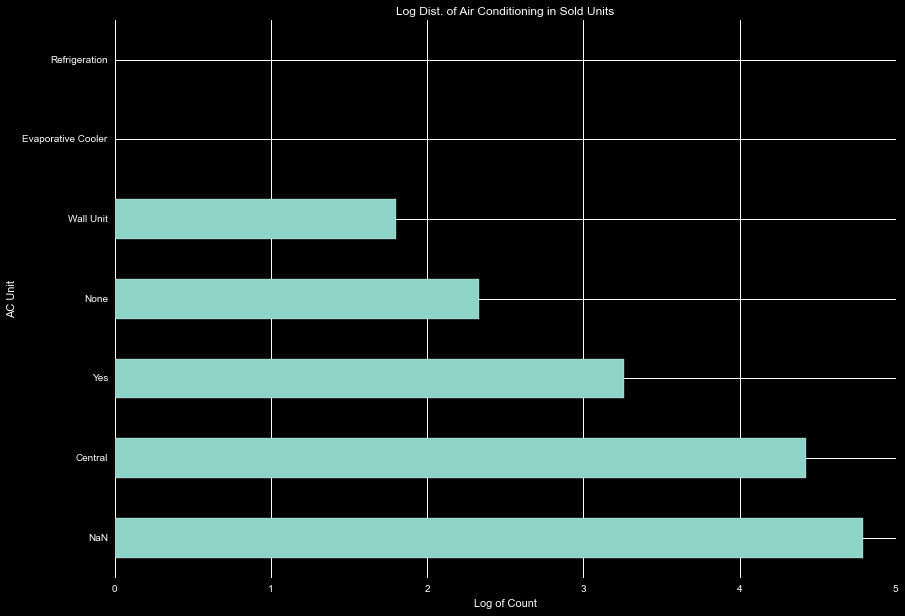

In [50]:
np.log10(foo['airconditioningtypeid'].value_counts( sort=True )).plot.barh().set_title('Log Dist. of Air Conditioning in Sold Units')
plt.xlabel( 'Log of Count' )
plt.ylabel( 'AC Unit'      )

(-1, 1)

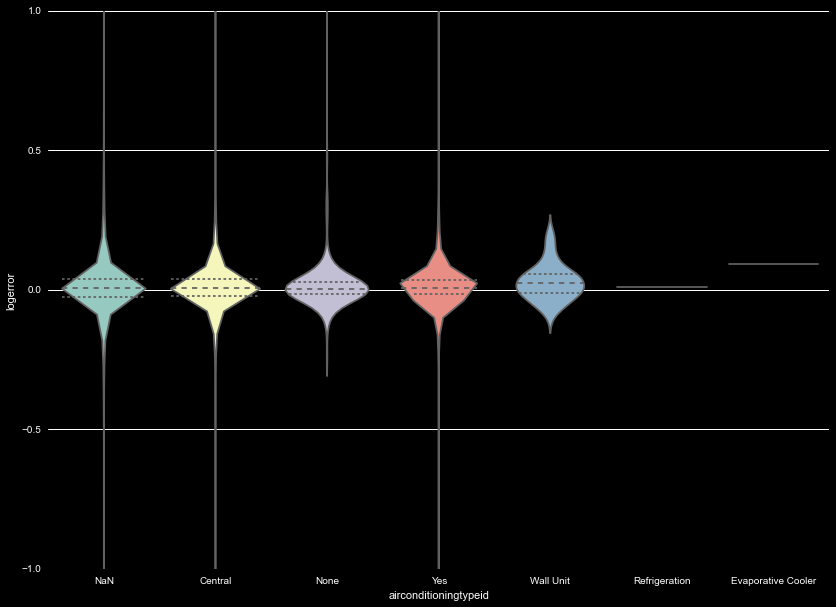

In [54]:
sns.violinplot( x='airconditioningtypeid', y='logerror', data=foo, inner='quart' )
plt.ylim( -1, 1 )

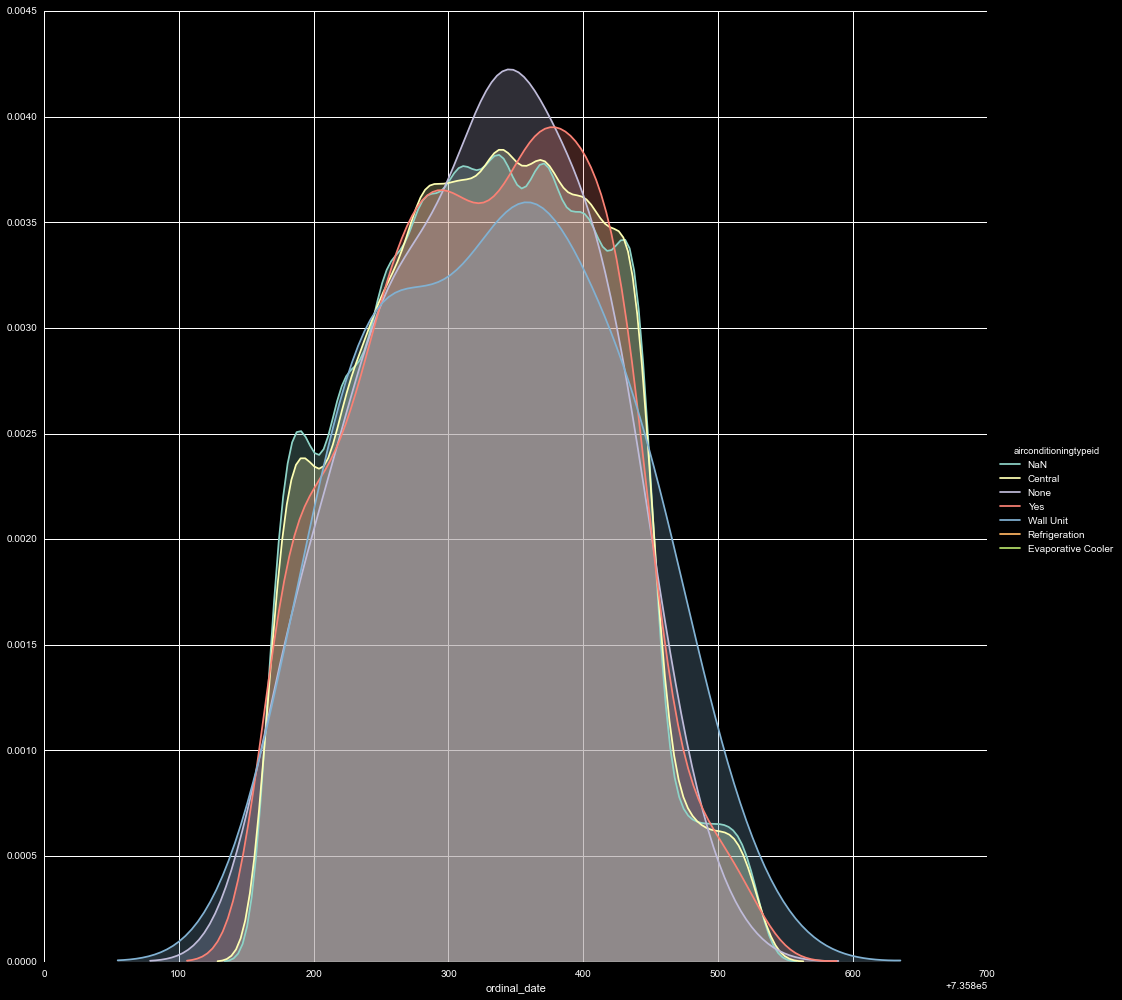

In [63]:
foo['ordinal_date'] = [x.toordinal() for x in foo['transactiondate']]
sns.FacetGrid( data=foo, hue='airconditioningtypeid', size=14 ).map( sns.kdeplot, 'ordinal_date', shade=True ).add_legend()

In [65]:
# Absorb Refrigeration, Evaporative Cooler, and Wall Unit into Yes, and recreate above plots
foo['airconditioningtypeid'].replace( {'Wall Unit':'Yes', 'Refrigeration':'Yes', 'Evaporative Cooler':'Yes'}, inplace=True )

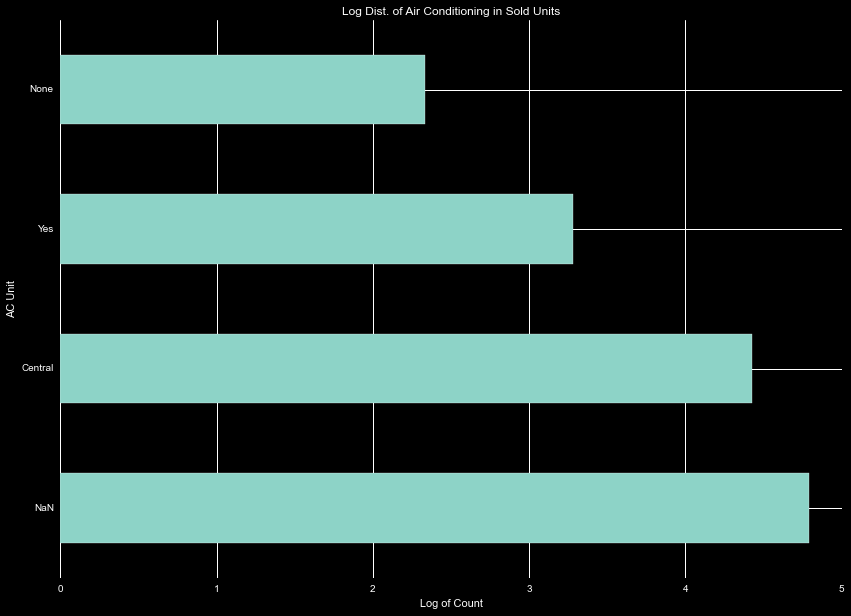

In [66]:
np.log10(foo['airconditioningtypeid'].value_counts( sort=True )).plot.barh().set_title('Log Dist. of Air Conditioning in Sold Units')
plt.xlabel( 'Log of Count' )
plt.ylabel( 'AC Unit'      )

(-1, 1)

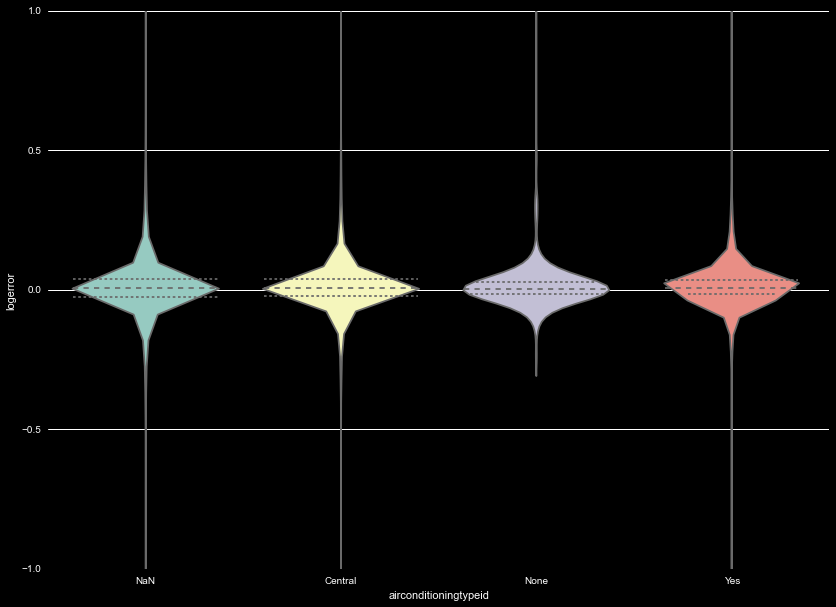

In [67]:
sns.violinplot( x='airconditioningtypeid', y='logerror', data=foo, inner='quart' )
plt.ylim( -1, 1 )

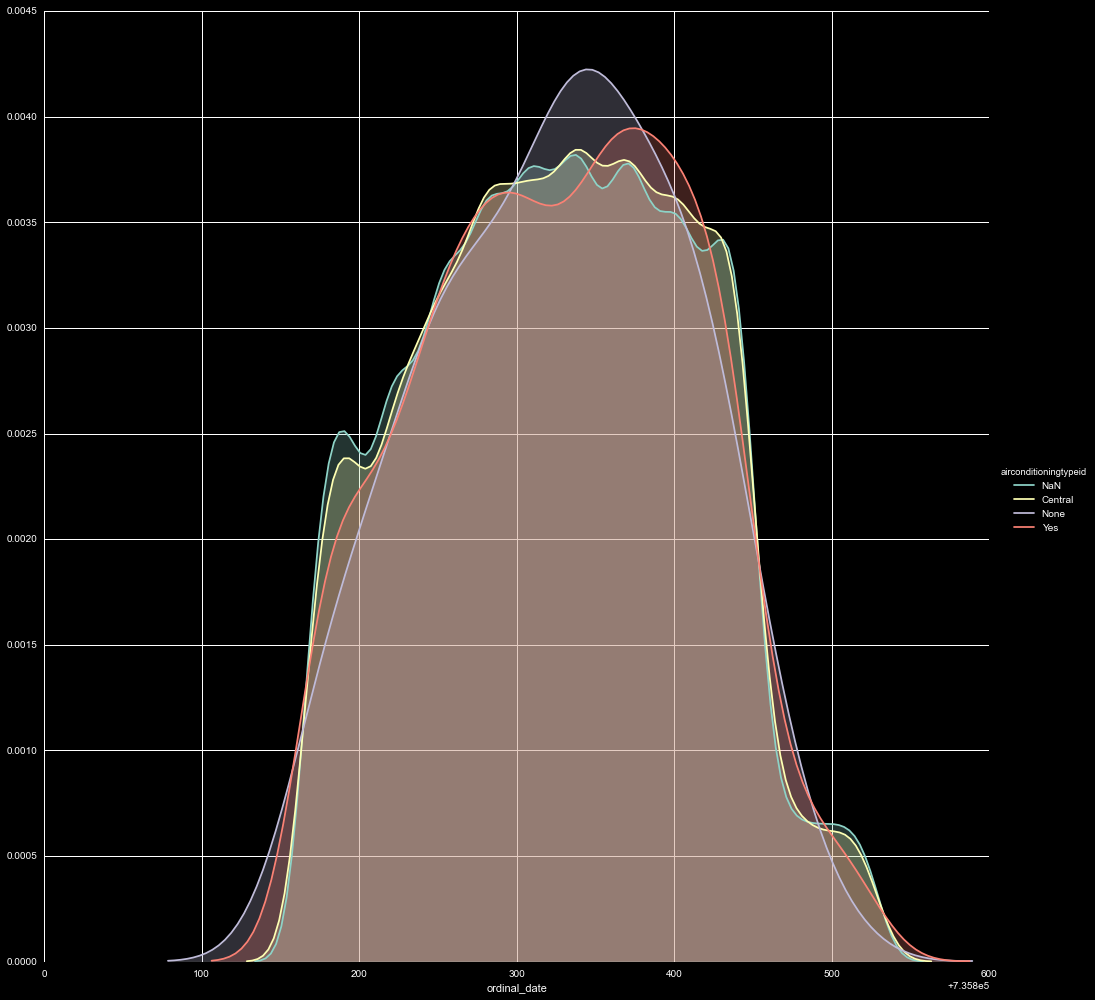

In [68]:
foo['ordinal_date'] = [x.toordinal() for x in foo['transactiondate']]
sns.FacetGrid( data=foo, hue='airconditioningtypeid', size=14 ).map( sns.kdeplot, 'ordinal_date', shade=True ).add_legend()

There are slight differences in the AC types

If we distinguish between, yes, no, nan, and central, there appears to be slight diffs in the time bought

StoryTypeID	StoryDesc

1	Attic & Basement
2	Attic
3	Bi-Level with Attic & Basement
4	Bi-Level
5	Bi-Level with Attic
6	Bi-Level with Basement
7	Basement
8	Split Entry with Attic & Basement
9	Split Foyer with Attic & Basement
10	Level with Attic & Basement
11	Level with Attic
12	Level with Basement
13	Level
14	Multi-Level with Attic & Basement
15	Multi-Level
16	Multi-Level with Attic
17	Multi-Level with Basement
18	Split Level with Attic & Basement
19	Single Level with Attic & Basement
20	Split Entry with Attic
21	Split Entry with Basement
22	Split Foyer with Attic
23	Split Foyer with Basement
24	Single Level with Attic
25	Single Level with Basement
26	Single Level
27	Split Level with Attic
28	Split Level with Basement
29	Split Entry
30	Split Foyer
31	Split Level
32	Tri-level with Attic & Basement
33	Tri-level with Attic
34	Tri-level with Basement
35	Tri-level

Another case with 2983953/2985217 missing

PropertyLandUseTypeID	PropertyLandUseDesc 11437/2985217

31	Commercial/Office/Residential Mixed Used
46	Multi-Story Store
47	Store/Office (Mixed Use)
246	Duplex (2 Units, Any Combination)
247	Triplex (3 Units, Any Combination)
248	Quadruplex (4 Units, Any Combination)
260	Residential General
261	Single Family Residential
262	Rural Residence
263	Mobile Home
264	Townhouse
265	Cluster Home
266	Condominium
267	Cooperative
268	Row House
269	Planned Unit Development
270	Residential Common Area
271	Timeshare
273	Bungalow
274	Zero Lot Line
275	Manufactured, Modular, Prefabricated Homes
276	Patio Home
279	Inferred Single Family Residential
290	Vacant Land - General
291	Residential Vacant Land

In [80]:
land_use_dict = {31	:'CommercialOfficeResidential',46	:'MultiStoryStore',47	:'StoreOffice',246	:'Duplex',247	:'Triplex',
                 248	:'Quadruplex',260	:'ResidentialGeneral',261	:'SingleFamilyResidential',262	:'RuralResidence',
                 263	:'MobileHome',264	:'Townhouse',265	:'ClusterHome',266	:'Condominium',267	:'Cooperative',268	:'RowHouse',
                 269	:'PlannedUnitDevelopment',270	:'ResidentialCommonArea',271	:'Timeshare',273	:'Bungalow',
                 274	:'ZeroLotLine',275	:'ManufacturedModularPrefabricatedHomes',276	:'PatioHome',
                 279	:'InferredSingleFamilyResidential',290	:'VacantLandGeneral',291	:'ResidentialVacantLand'}

In [81]:
var = 'propertylandusetypeid'
foo = my_df[['logerror','transactiondate',var]].copy()
foo[var] = foo[var].replace( land_use_dict )
foo[var].fillna( 'NaN', inplace=True )

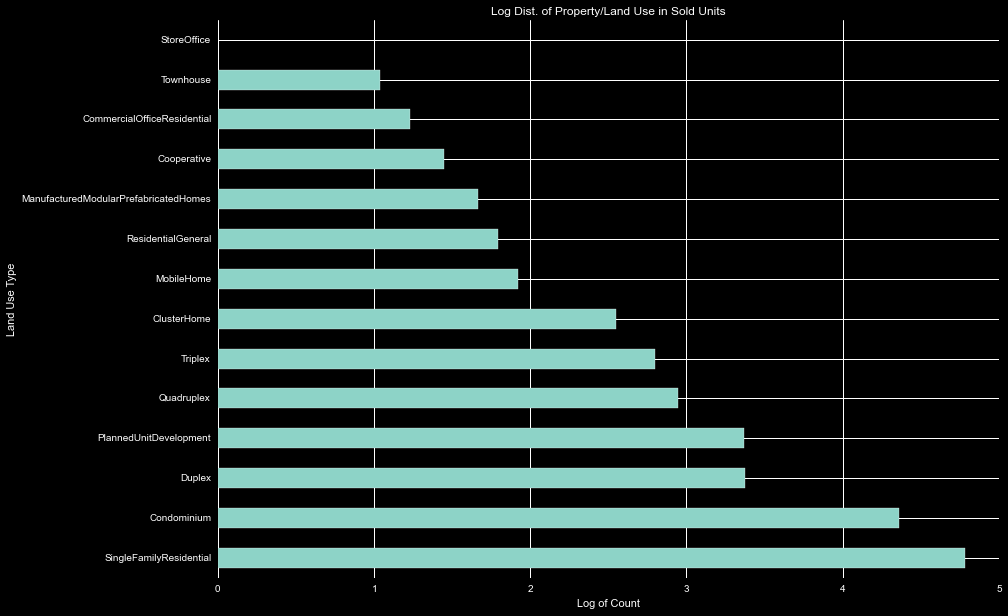

In [83]:
np.log10(foo[var].value_counts( sort=True )).plot.barh().set_title('Log Dist. of Property/Land Use in Sold Units')
plt.xlabel( 'Log of Count' )
plt.ylabel( 'Land Use Type' )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

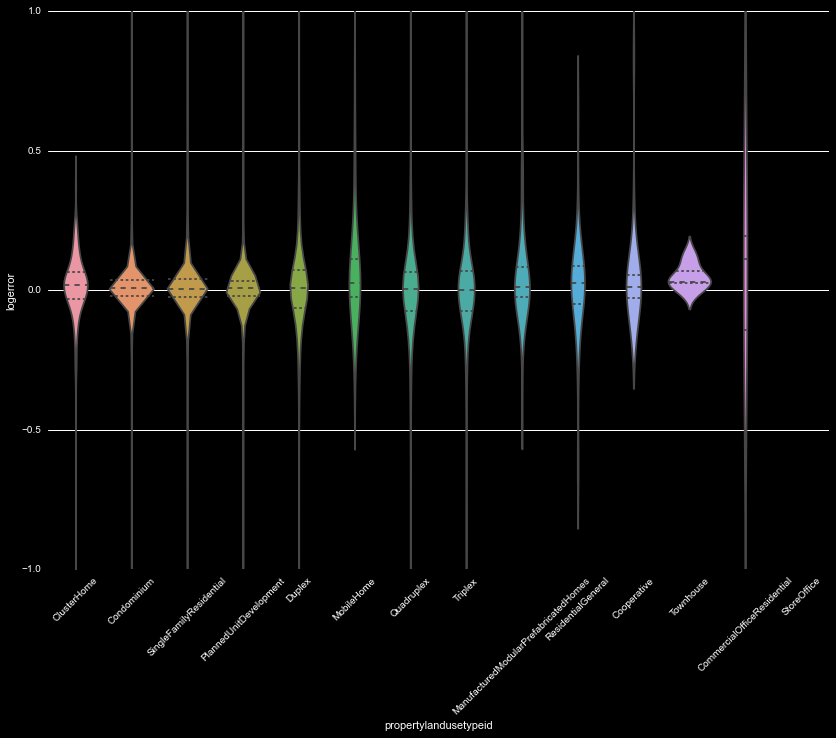

In [87]:
ax = sns.violinplot( x=var, y='logerror', data=foo, inner='quart' )
plt.ylim( -1, 1 )
plt.xticks( rotation=45 )
#ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)

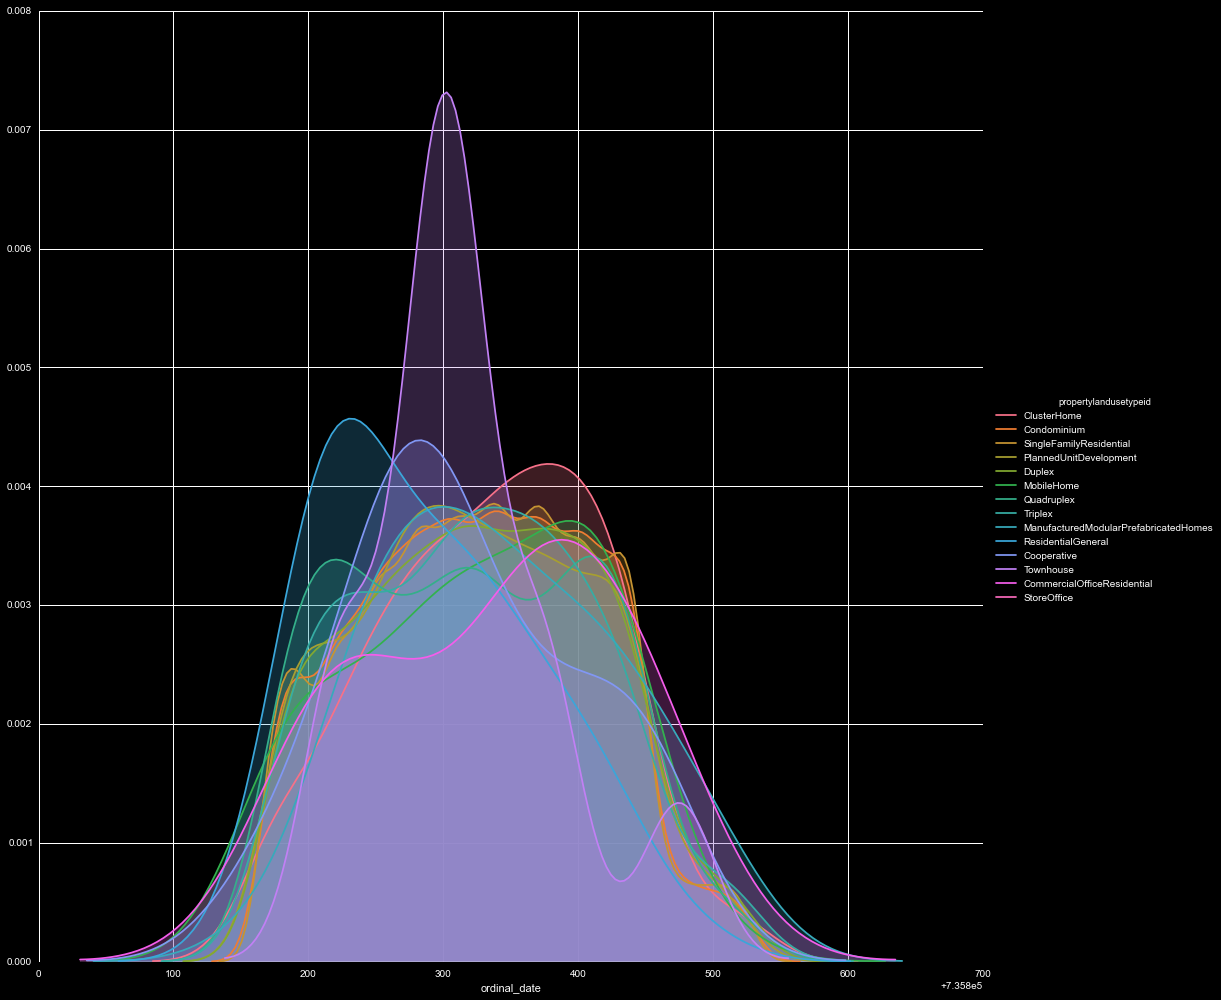

In [88]:
foo['ordinal_date'] = [x.toordinal() for x in foo['transactiondate']]
sns.FacetGrid( data=foo, hue=var, size=14 ).map( sns.kdeplot, 'ordinal_date', shade=True ).add_legend()

HeatingOrSystemTypeID	HeatingOrSystemDesc 1178816/2985217

1	Baseboard
2	Central
3	Coal
4	Convection
5	Electric
6	Forced air
7	Floor/Wall
8	Gas
9	Geo Thermal
10	Gravity
11	Heat Pump
12	Hot Water
13	None
14	Other
15	Oil
16	Partial
17	Propane
18	Radiant
19	Steam
20	Solar
21	Space/Suspended
22	Vent
23	Wood Burning
24	Yes
25	Zone

In [91]:
heating_dict = {1	:'Baseboard',2	:'Central',3	:'Coal',4	:'Convection',5	:'Electric',6	:'Forced air',7	:'Floor/Wall',8	:'Gas',
                9	:'Geo Thermal',10	:'Gravity',11	:'Heat Pump',12	:'Hot Water',13	:'None',14	:'Other',15	:'Oil',16	:'Partial',
                17	:'Propane',18	:'Radiant',19	:'Steam',20	:'Solar',21	:'SpaceSuspended',22	:'Vent',23	:'Wood Burning',24:'Yes',
                25	:'Zone'}

In [92]:
var = 'heatingorsystemtypeid'
foo = my_df[['logerror','transactiondate',var]].copy()
foo[var] = foo[var].replace( heating_dict )
foo[var].fillna( 'NaN', inplace=True )

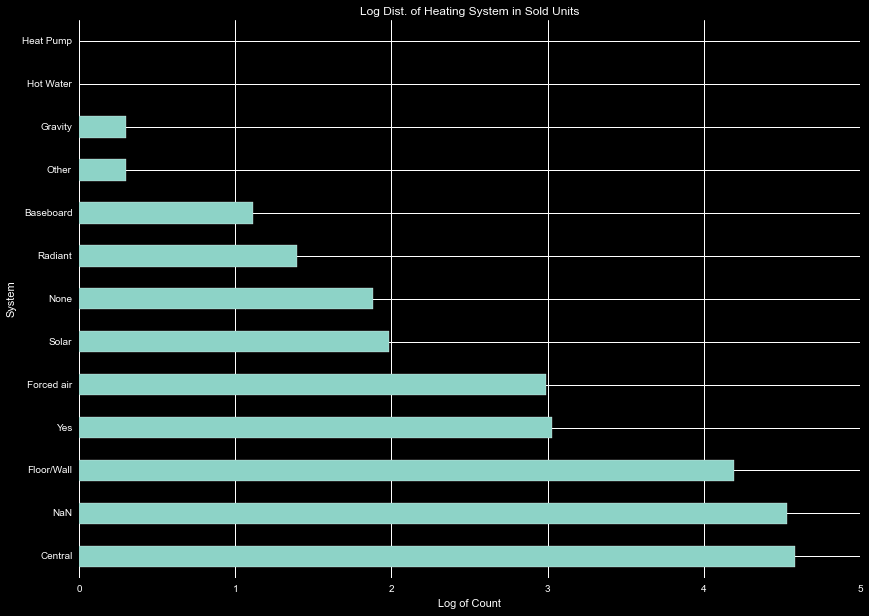

In [94]:
np.log10(foo[var].value_counts( sort=True )).plot.barh().set_title('Log Dist. of Heating System in Sold Units')
plt.xlabel( 'Log of Count' )
plt.ylabel( 'System' )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

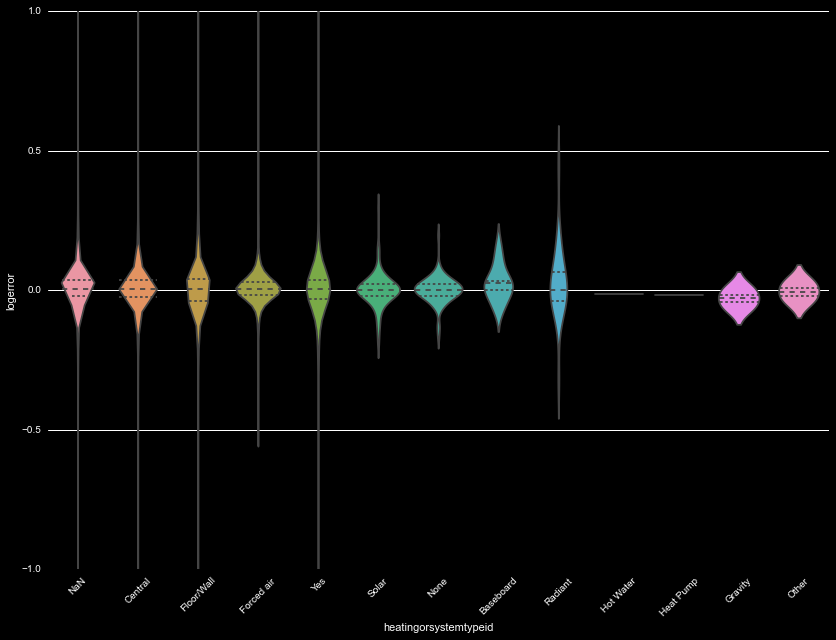

In [96]:
ax = sns.violinplot( x=var, y='logerror', data=foo, inner='quart' )
plt.ylim( -1, 1 )
plt.xticks( rotation=45 )
#ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)

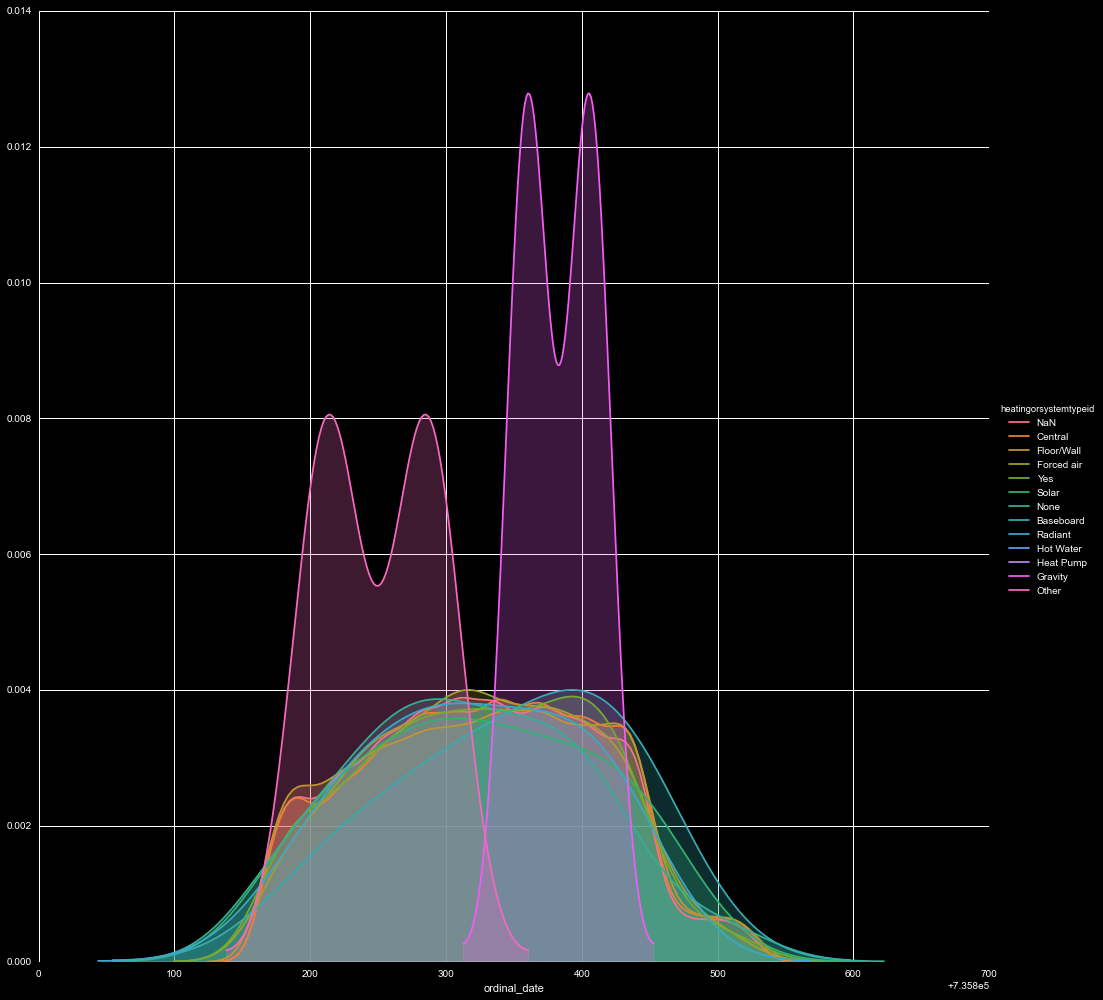

In [97]:
foo['ordinal_date'] = [x.toordinal() for x in foo['transactiondate']]
sns.FacetGrid( data=foo, hue=var, size=14 ).map( sns.kdeplot, 'ordinal_date', shade=True ).add_legend()